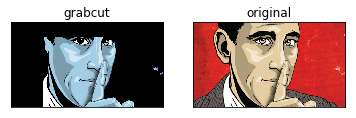

In [9]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("salinger.jpg")
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (100, 50, 421, 378)
cv2.grabCut(img, mask, rect, bgdModel, fgdModel, 5, cv2.GC_INIT_WITH_RECT)


mask2 = np.where((mask == 2)| (mask == 0), 0, 1).astype('uint8')
img = img*mask2[:,:,np.newaxis]



plt.subplot(121),plt.imshow(img)
plt.title("grabcut"),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(cv2.cvtColor(cv2.imread("salinger.jpg"), cv2.COLOR_BGR2RGB))
plt.title("original"), plt.xticks([]), plt.yticks([])
plt.show()

In [11]:
import cv2
help (cv2.grabCut)
help (cv2.dilate)

Help on built-in function grabCut:

grabCut(...)
    grabCut(img, mask, rect, bgdModel, fgdModel, iterCount[, mode]) -> mask, bgdModel, fgdModel
    .   @brief Runs the GrabCut algorithm.
    .   
    .   The function implements the [GrabCut image segmentation algorithm](http://en.wikipedia.org/wiki/GrabCut).
    .   
    .   @param img Input 8-bit 3-channel image.
    .   @param mask Input/output 8-bit single-channel mask. The mask is initialized by the function when
    .   mode is set to GC_INIT_WITH_RECT. Its elements may have one of the cv::GrabCutClasses.
    .   @param rect ROI containing a segmented object. The pixels outside of the ROI are marked as
    .   "obvious background". The parameter is only used when mode==GC_INIT_WITH_RECT .
    .   @param bgdModel Temporary array for the background model. Do not modify it while you are
    .   processing the same image.
    .   @param fgdModel Temporary arrays for the foreground model. Do not modify it while you are
    .   process

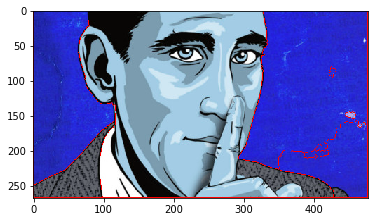

In [15]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread("salinger.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

ret, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+ cv2.THRESH_OTSU)

kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 2)

sure_bg = cv2.dilate(opening, kernel, iterations = 3)
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(),255, 0)

sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg, sure_fg)


ret, markers = cv2.connectedComponents(sure_fg)

markers = markers + 1
markers[unknown == 255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255, 0, 0]
plt.imshow(img)
plt.show()